In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [2]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(type(digits.data))
print(digits.data.shape)

<class 'numpy.ndarray'>
(1797, 64)


In [5]:
print(type(digits.data[0]))
print(digits.data[0].shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


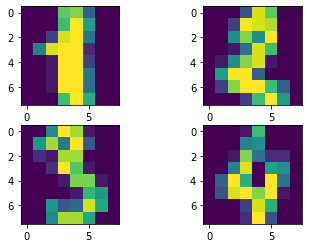

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1, 5):
    plt.subplot(2,2, i)
    plt.imshow(digits.data[i].reshape(8, 8))
plt.show()

In [7]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [8]:
import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size= 0.25 )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [15]:
# Train a SVM classification model
from time import time
print("Fitting the classifier to the training set")
t0 = time()

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
#clf = SVC(C= 1, gamma = 0.1, verbose=True, kernel='rbf')
#Tuning: Model selection
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV( SVC(kernel='linear'), param_grid)
clf.fit(X_train, y_train)
print("done in %0.3fs" , (time() - t0))

Fitting the classifier to the training set


C:\Users\sales2\Anaconda3\envs\Plain\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


done in %0.3fs 2.2745110988616943


In [16]:
clf.score(X_test, y_test)

0.9777777777777777

In [17]:
print("Best parameters selected from Grid search", clf.best_params_) 
print("Indices of support vectors", clf.best_estimator_.support_)
print("Number of support vectors per each class", clf.best_estimator_.n_support_ )
print("Dual coeffecients", clf.best_estimator_.dual_coef_[0])

Best parameters selected from Grid search {'C': 1000.0, 'gamma': 0.0001}
Indices of support vectors [  15   80  141  193  219  237  253  318  360  500  514  596  631  831
  839  881  891  902  972 1023 1077 1105 1276 1288   14   16   21   27
   47   76  195  199  239  294  317  324  351  381  395  437  458  516
  532  543  549  566  640  666  668  675  679  718  749  761  808  824
  882 1017 1040 1082 1092 1112 1147 1177 1208 1253 1267 1312 1326   38
  231  245  256  283  424  494  544  570  574  584  590  610  717  739
  763  826  862  872  883  951  971 1038 1076 1118 1131 1134 1142 1197
 1225 1239 1245 1246 1265 1320 1333 1343   52   73   88  114  173  205
  216  260  261  273  319  338  371  473  537  542  546  572  644  656
  714  719  787  802  827  828  840  863  885  911  954  988  995 1015
 1030 1101 1120 1160 1248    0    5    8   65  220  258  280  288  297
  406  412  425  435  508  548  582  618  636  697  780  886  936  966
 1048 1079 1135 1148 1167 1185 1204 1221 1236 12

In [18]:
from sklearn import neighbors, linear_model
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=7000,
                                           multi_class='multinomial', verbose=2)

t0 = time()
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))
print("done in %0.3fs" , (time() - t0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression score: 0.962222
done in %0.3fs 1.2479350566864014


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [23]:
print("Indices of support vectors", clf.best_estimator_.support_.shape)
print("Dual coeffecients", clf.best_estimator_.dual_coef_.shape)
print("Primal coeffecients", clf.best_estimator_.coef_.shape)
print("Primal coeffecients", clf.best_estimator_.coef_[0].shape)

Indices of support vectors (373,)
Dual coeffecients (9, 373)
Primal coeffecients (45, 64)
Primal coeffecients (64,)


In [28]:
help(clf)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth